In [4]:
import solver
import ensemble
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [5]:
choice = 4
while (not choice in range(4)):
    print("""Select type of atmosphere to simulate on:
          0: Constant value
          1: Exponential formula (default)
          2: Tabular function
          3: Mars' atmosphere""")
    try:
        choice = int(input("> "))
    except ValueError:
        print("Only digits allowed as inputs")
    if choice == 0:
        atmos_func = "constant"
    elif choice == 1:
        atmos_func = "exponential"
    elif choice == 2:
        atmos_func = "tabular"
    elif choice == 3:
        atmos_func = "mars"
    else:
        print ("Please enter a number between 0 and 3")
my_planet = solver.Planet(atmos_func,atmos_filename="../data/AltitudeDensityTable.csv")

fiducial_impact = {'radius': 10,
'velocity': 20e3,
'density': 3000,
'strength': 1e5,
'angle': 45}
defaults = [10, 45, 1e5, 20e3, 3000]

variables = []
constants = ['radius','angle','strength','velocity','density']

choice = 1

while choice != 0:
    print("""You are allowed to perform uncertainty analysis on the data. Please pick which
        attributes you want to vary, or choose 6 to perform only one exact simulation. Enter 0
        when ready to move on to the next step.
        
        1. Radius
        2. Angle
        3. Strength
        4. Velocity
        5. Density
        6. Perform no changes
        
        Changes being made so far: """+str(variables)+"\n")
    try:
        choice = int(input("> "))
    except ValueError:
        print("Only digits allowed as inputs")
        continue
    if choice == 1 and "radius" in constants:
        variables.append("radius")
        constants.remove("radius")
    elif choice == 2 and "angle" in constants:
        variables.append("angle")
        constants.remove("angle")
    elif choice == 3 and "strength" in constants:
        variables.append("strength")
        constants.remove("strength")
    elif choice == 4 and "velocity" in constants:
        variables.append("velocity")
        constants.remove("velocity")
    elif choice == 5 and "density" in constants:
        variables.append("density")
        constants.remove("density")
    elif choice == 6:
        variables = []
        constants = ['radius','angle','strength','velocity','density']

uncertain = True
if not variables:
    arguments = constants.copy()        

    i = 0
    while i < len(constants):
        try:
            answer = input("Please enter %s (leave blank for default): " % constants[i])
            arguments[i] = float(answer)
            i += 1
        except ValueError:
            if len(answer) == 0:
                arguments[i] = defaults[i]
                i += 1
            else:
                print("Must be a float!")
    result, outcome = my_planet.impact(
                     radius=arguments[0], angle=arguments[1], strength=arguments[2], velocity=arguments[3], density=arguments[4], init_altitude= 100000, dt = 0.05)
    print("The outcome was a(n) %s event" % outcome['outcome'])
    uncertain = False
else:
    try: 
        samples = int(input("Please choose number of samples to use (default is 30): "))
    except ValueError:
        print("Must be int! Using default")
        samples = 30
    for i in constants:
        try:
            fiducial_impact[i] = float(input("Please enter %s: " % i))
        except ValueError:
            print("Must be float! Using default value instead")
    result = ensemble.solve_ensemble(my_planet, fiducial_impact, variables,samples=samples)
    print("Done!")

Select type of atmosphere to simulate on:
          0: Constant value
          1: Exponential formula (default)
          2: Tabular function
          3: Mars' atmosphere


>  1


You are allowed to perform uncertainty analysis on the data. Please pick which
        attributes you want to vary, or choose 6 to perform only one exact simulation. Enter 0
        when ready to move on to the next step.
        
        1. Radius
        2. Angle
        3. Strength
        4. Velocity
        5. Density
        6. Perform no changes
        
        Changes being made so far: []



>  1


You are allowed to perform uncertainty analysis on the data. Please pick which
        attributes you want to vary, or choose 6 to perform only one exact simulation. Enter 0
        when ready to move on to the next step.
        
        1. Radius
        2. Angle
        3. Strength
        4. Velocity
        5. Density
        6. Perform no changes
        
        Changes being made so far: ['radius']



>  4


You are allowed to perform uncertainty analysis on the data. Please pick which
        attributes you want to vary, or choose 6 to perform only one exact simulation. Enter 0
        when ready to move on to the next step.
        
        1. Radius
        2. Angle
        3. Strength
        4. Velocity
        5. Density
        6. Perform no changes
        
        Changes being made so far: ['radius', 'velocity']



>  5


You are allowed to perform uncertainty analysis on the data. Please pick which
        attributes you want to vary, or choose 6 to perform only one exact simulation. Enter 0
        when ready to move on to the next step.
        
        1. Radius
        2. Angle
        3. Strength
        4. Velocity
        5. Density
        6. Perform no changes
        
        Changes being made so far: ['radius', 'velocity', 'density']



>  0
Please choose number of samples to use (default is 30):  300
Please enter angle:  45
Please enter strength:  1e5


Done!


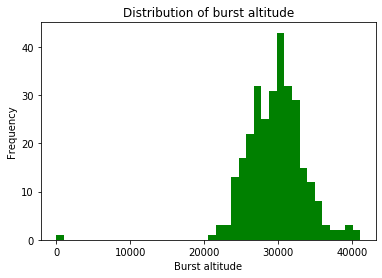

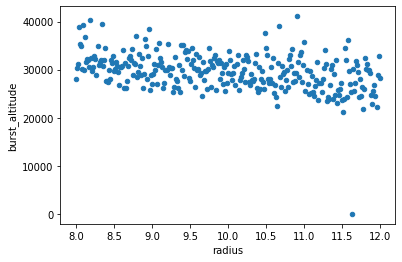

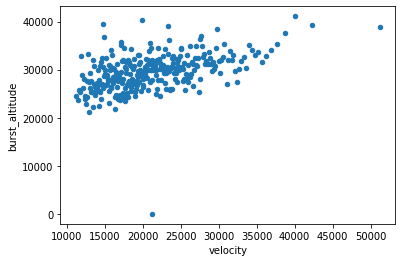

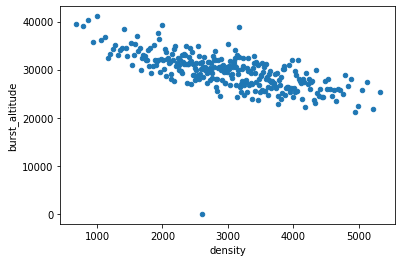

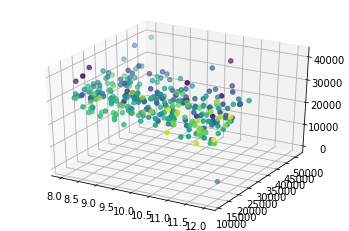

In [6]:
if not uncertain:
    print("The final conditions were: ")
    print(result.iloc[-1])
    print("The trajectory followed by the asteroid was: ")
    result.plot(x="distance",y="altitude",kind="line")
    plt.show()
    print("The energy as a function of altitude: ")
    result.plot(x="dedz",y="altitude",kind="line")
else:
    altitudes = result['burst_altitude']
    count, bins, ignored = plt.hist(altitudes, 40, facecolor='green')
    plt.xlabel('Burst altitude')
    plt.ylabel('Frequency')
    plt.title('Distribution of burst altitude')
    for i in variables:
        result.plot(x=i, y='burst_altitude', kind='scatter')
    if (len(variables) == 2):
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(result[variables[0]], result[variables[1]], result['burst_altitude'])
    elif (len(variables) == 3):
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(result[variables[0]], result[variables[1]], result['burst_altitude'], c=result[variables[2]])